# Explore here

In [32]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/raw/winequality-red.csv", sep=";")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#para crear la columna label dividimos la columna quality en "baja calidad (0-4)", "Calidad media (5-6)" y "Alta Calidad" (7-10)
def label_column(q):
    if q < 4: 
        return 0
    elif q <= 6:
        return 1
    else: 
        return 2
# 0 es baja calidad, 1 es media calidad y 2 es buena calidad
df["label"] = df["quality"].apply(label_column)

In [6]:
df['label'].value_counts()

label
1    1372
2     217
0      10
Name: count, dtype: int64

In [9]:
df = df.drop_duplicates()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [16]:
#creamos el conjunto de entrenamiento y prueba
X = df.drop(['quality', 'label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# k-NN sin escalar los datos
yhat_no_scaling = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(X_train, y_train).predict(X_test)

In [18]:
# k-NN con datos escalados usando StandardScaler
sc_standard = StandardScaler().fit(X_train)
yhat_standard = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(sc_standard.transform(X_train), y_train).predict(sc_standard.transform(X_test))

In [21]:
# k-NN con datos escalados usando MinMaxScaler
sc_norm = MinMaxScaler().fit(X_train)
yhat_norm = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(sc_norm.transform(X_train), y_train).predict(sc_norm.transform(X_test))

In [23]:
print(f'Reporte para los datos sin escalar:\n{classification_report(y_test, yhat_no_scaling)}')
print(f'Reporte para los datos estandarizados:\n{classification_report(y_test, yhat_standard)}')

Reporte para los datos sin escalar:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      0.94      0.92       234
           2       0.43      0.29      0.35        34

    accuracy                           0.85       272
   macro avg       0.44      0.41      0.42       272
weighted avg       0.82      0.85      0.83       272

Reporte para los datos estandarizados:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.91      0.94      0.93       234
           2       0.55      0.47      0.51        34

    accuracy                           0.87       272
   macro avg       0.49      0.47      0.48       272
weighted avg       0.85      0.87      0.86       272



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
print(f'Reporte para los datos normalizados:\n{classification_report(y_test, yhat_norm)}')

Reporte para los datos normalizados:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.91      0.94      0.93       234
           2       0.55      0.50      0.52        34

    accuracy                           0.87       272
   macro avg       0.49      0.48      0.48       272
weighted avg       0.85      0.87      0.86       272



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [25]:
# OPTIMIZAMOS K CON VALORES DE 1 A 20
k_range = range(1,21)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(sc_standard.transform(X_train), y_train)
    y_pred = knn.predict(sc_standard.transform(X_test))
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [29]:
for k, acc in zip(k_range, accuracies):
    print(f'k = {k}, accuracy = {acc *100:.2f}')

k = 1, accuracy = 83.09
k = 2, accuracy = 85.66
k = 3, accuracy = 87.13
k = 4, accuracy = 87.87
k = 5, accuracy = 87.13
k = 6, accuracy = 87.50
k = 7, accuracy = 88.60
k = 8, accuracy = 88.24
k = 9, accuracy = 89.71
k = 10, accuracy = 90.81
k = 11, accuracy = 89.71
k = 12, accuracy = 91.18
k = 13, accuracy = 90.07
k = 14, accuracy = 90.44
k = 15, accuracy = 88.24
k = 16, accuracy = 88.60
k = 17, accuracy = 88.97
k = 18, accuracy = 89.34
k = 19, accuracy = 89.71
k = 20, accuracy = 90.07


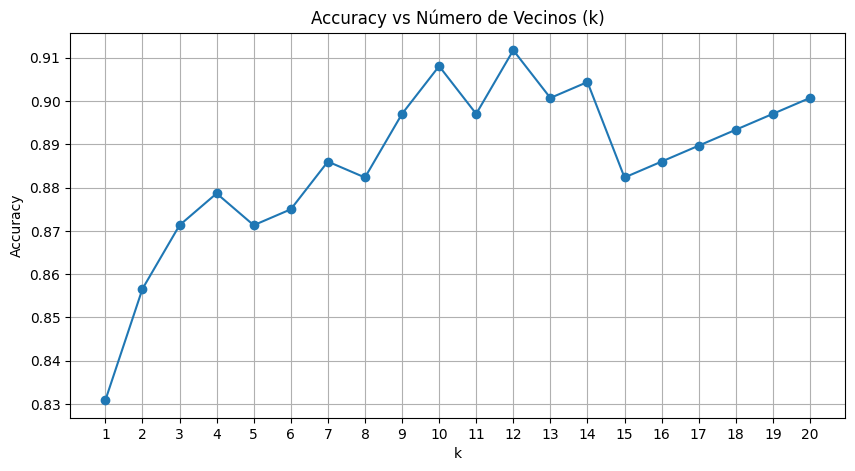

In [ ]:
# k = 12 es el que tiene mejor accuracy
#graficamos las difernecias entre todads las k
plt.figure(figsize=(10,5))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs Número de Vecinos (k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [31]:
#entrenamos el modelo con K=12
knn_final = KNeighborsClassifier(n_neighbors=12, algorithm='brute')
knn_final.fit(sc_standard.transform(X_train), y_train)
y_pred_final = knn_final.predict(sc_standard.transform(X_test))

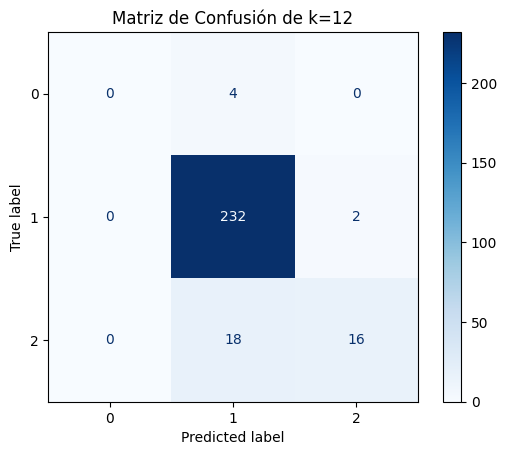

In [34]:
#creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión de k=12')
plt.show()

In [ ]:
#hacemos las métricas de clasificación de k=12
print(classification_report(y_test, y_pred_final, target_names=["Baja", "Media", "Alta"]))

              precision    recall  f1-score   support

        Baja       0.00      0.00      0.00         4
       Media       0.91      0.99      0.95       234
        Alta       0.89      0.47      0.62        34

    accuracy                           0.91       272
   macro avg       0.60      0.49      0.52       272
weighted avg       0.90      0.91      0.89       272



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


El modelo KNN k = 12 tiene un accuracy de 91%, el más alto, en la matriz de confusión se ve claramente comi predice la gran mayoría de la calidad del vino como "media". La calidad alta y baja son las más perjudicadas porque la alta tiene un recall muy bajo, por lo que confundo vinos de alta calidad con media calidad. La calidad baja solo tiene 4 ejemplos y los confunde todos. 